# Data Preprocessing (MFCC Extraction)

This notes walks you through the steps taken to extract MFCCs from an audio data.

Ref:
- https://www.youtube.com/watch?v=WJI-17MNpdE
- https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

In [ ]:
import os
import numpy as np

import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

## Download Sample Audio
Download a sample audio from LibriSpeech dataset

In [ ]:
!wget https://dagshub.com/DagsHub/Librispeech-ASR-corpus/raw/2fead768d9690a42d186188ed77a6d4c63c949dd/test-clean/8230/279154/8230-279154-0003.flac

--2023-01-09 18:26:46--  https://dagshub.com/DagsHub/Librispeech-ASR-corpus/raw/2fead768d9690a42d186188ed77a6d4c63c949dd/test-clean/8230/279154/8230-279154-0003.flac
Resolving dagshub.com (dagshub.com)... 35.186.200.224
Connecting to dagshub.com (dagshub.com)|35.186.200.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘8230-279154-0003.flac’

8230-279154-0003.fl     [ <=>                ]  58.22K  --.-KB/s    in 0.005s  

2023-01-09 18:26:46 (12.5 MB/s) - ‘8230-279154-0003.flac’ saved [59622]



In [ ]:
audio_path = "/content/8230-279154-0003.flac"

In [ ]:
ipd.Audio(audio_path)

## Extract Signal

In [ ]:
signal, sample_rate =  librosa.load(audio_path)

In [ ]:
duration = librosa.get_duration(y=signal, sr=sample_rate)
duration

3.195011337868481

In [ ]:
time = np.arange(0, duration, 1/sample_rate) 

In [ ]:
signal.shape, sample_rate, duration*sample_rate # duration*sample_rate = signal

((70450,), 22050, 70450.0)

In [ ]:
signal[:10]

array([-0.00030181, -0.00045639, -0.00055192, -0.00066003, -0.00062895,
       -0.00047651, -0.00041517, -0.00042649, -0.00040612, -0.00037439],
      dtype=float32)

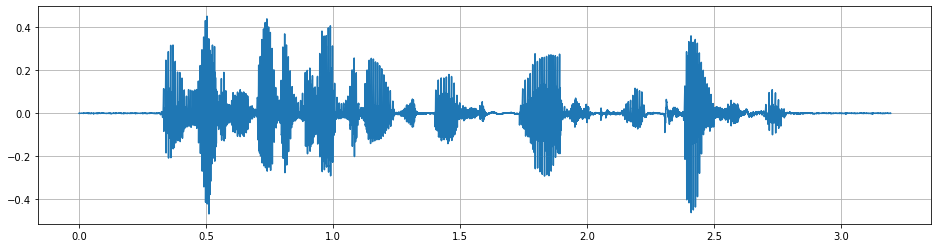

In [ ]:
# Visualize the signal in raw wav form
plt.figure(figsize=(16,4))
plt.plot(time, signal)
plt.grid()
plt.show()

## Extract MFCCs

In [ ]:
# If you're interested in the detailed steps of extracting mfccs, please refer to the https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html
mfccs = librosa.feature.mfcc(signal, n_mfcc=13, sr=sample_rate)
mfccs.shape

(13, 138)

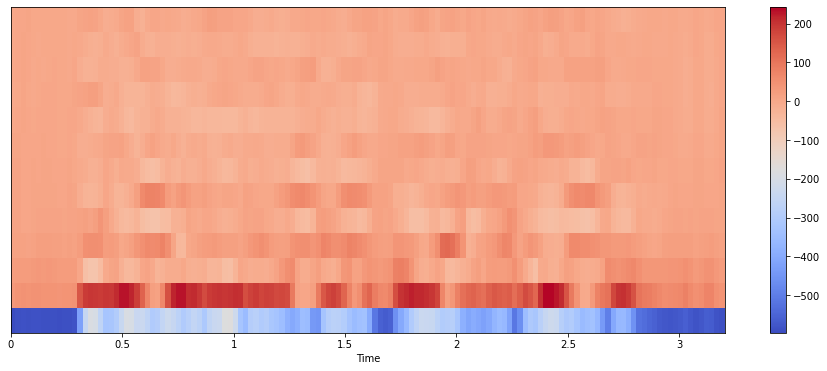

In [ ]:
# Visuzlize MFCCs
plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs, x_axis="time", sr=sample_rate) # x_axis: time of audio & y_axis: 13 mfcc coefficients
plt.colorbar()
plt.show()

In [ ]:
# Extract 1st and 2nd derivatives of the mfccs

In [ ]:
delta_1 = librosa.feature.delta(mfccs)
delta_2 = librosa.feature.delta(mfccs, order=2)

In [ ]:
delta_1.shape, delta_2.shape

((13, 138), (13, 138))

Visualize delta_1 and delta_2

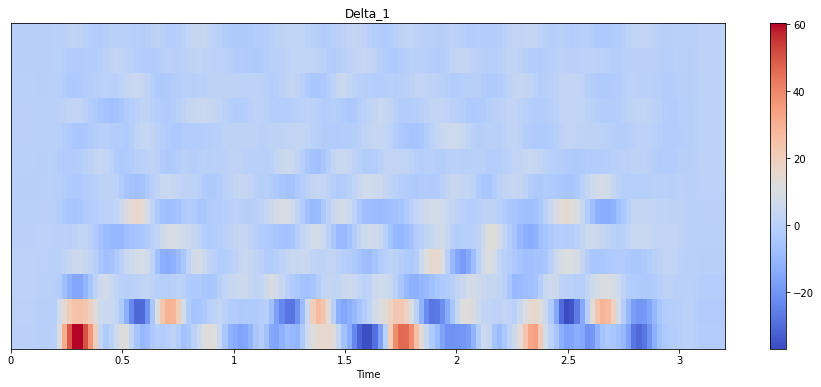

In [ ]:
plt.figure(figsize=(16,6))
librosa.display.specshow(delta_1, x_axis="time", sr=sample_rate)
plt.colorbar()
plt.title("Delta_1")
plt.show()

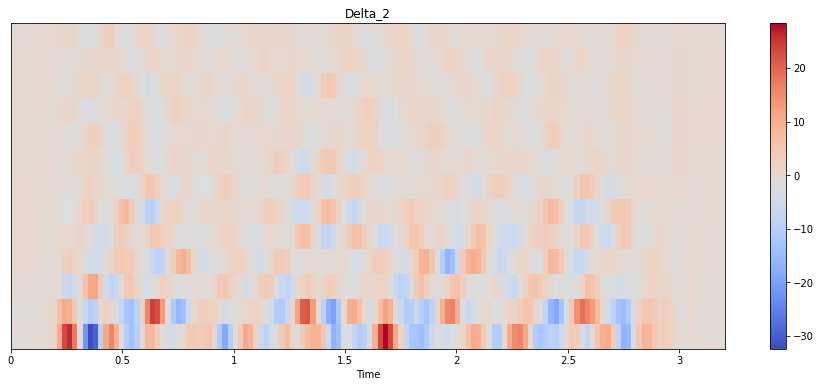

In [ ]:
plt.figure(figsize=(16,6))
librosa.display.specshow(delta_2, x_axis="time", sr=sample_rate)
plt.colorbar()
plt.title("Delta_2")
plt.show()

Concatenate all the information to get a unique and informative data

In [ ]:
mfccs_final = np.concatenate((mfccs, delta_1, delta_2))

In [ ]:
mfccs_final.shape # 13*3 = 39

(39, 138)

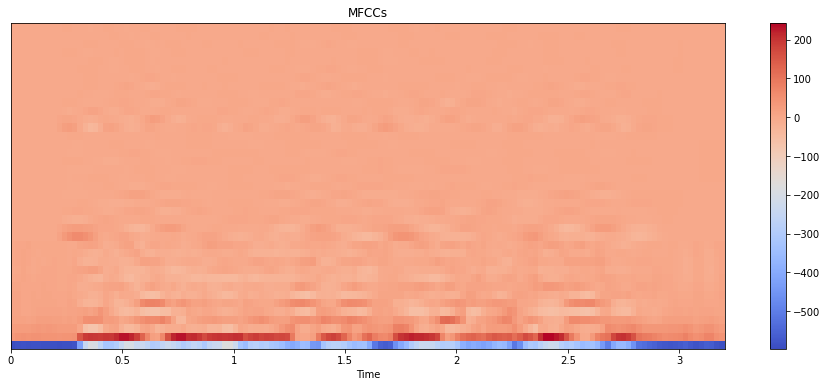

In [ ]:
plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs_final, x_axis="time", sr=sample_rate)
plt.colorbar()
plt.title("MFCCs")
plt.show()

Normalization
Allows to improve singal to noise (SNR) ratio

In [ ]:
mfccs_final -= (np.mean(mfccs_final, axis=0) + 1e-8)

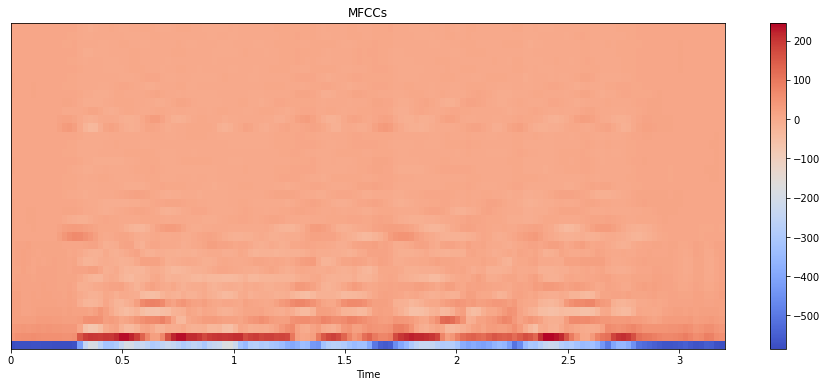

In [ ]:
plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs_final, x_axis="time", sr=sample_rate)
plt.colorbar()
plt.title("MFCCs")
plt.show()